Pobieranie numpy, random do przetwarzania obliczeń i bibliotekę do tworzenia wykresów - matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

Do trenowania wszelako pojętych modeli sztucznej inteligencji potrzeba posiąść dane. Ponieważ w przypadku bramek logicznych łatwo przewidzieć dane wychodzące, i korelujące z nimi dane wchodzące - te dane można wygenerować

In [2]:
def gen_data(amount, logic_gate):
    data = []
    for _ in range(amount):
        q, p = randint(0,1), randint(0,1)
        data.append([q,p,int(logic_gate(q,p))])
    return np.array(data)

In [3]:
def test_activation(func, min, max, step):
    x = np.arange(min, max, step)
    y = [func(i) for i in x ]
    plt.figure(figsize=(10,10))
    plt.plot(x,y,label='sigmoid')
    plt.show()

Ponieważ większość problemów w otaczającym nas świecie można określić jako nieliniowe, trzeba tą nieliniowość zagwarantować poprzez funkcje aktywacji.

In [4]:
def sigmoid(x) -> float: # sigmoidalna funkcja aktywacji
    return 1 / (1 + np.exp(-x))

In [5]:
def relu(x): # funkcja aktywacji relu
    return np.array(max(0, x)).reshape((1,1))

In [6]:
def tanh(x): # funkcja aktywacji tanh
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)).reshape((1,1))

In [7]:
def heasidive(x): # funkcja aktywacji heasidive
    return 1 if x >= 0 else 0

Neurony "wiedzą" kiedy zwracają niepoprawną wartość dzięki funkcji błędu

In [8]:
def prercept_error(y_hat, y): # prosta funkcja błędu 
    return  (y - y_hat) ** 2

In [18]:
class Neuron: # Klasa nadrzędna neuronu
    def __init__(self, activation, input_size = 2) -> None:
        self.activation = activation
        self.input_size = (1,input_size)
        self.weights = np.random.rand(input_size).reshape(self.input_size)
        self.bias = 0
    
    def forward(self, x):
        weighted = x @ self.weights.T
        biased = weighted + self.bias
        return self.activation(biased)
    
    def backward(self, x, y, y_hat, lr):
        error = self._error_function(y, y_hat)
        dC_dw = x.T @ error
        dC_db = np.sum(error)
        self.weights += (lr * dC_dw).T
        self.bias += lr * dC_db

    def fit(self, x_data, y_data, lr, epoch):
        error_plot = []
        for e in range(epoch):
            total_cost = 0
            for x, y in zip(x_data, y_data):
                x = x.reshape(self.input_size)
                y_hat = self.forward(x)
                self.backward(x, y, y_hat, lr)
                total_cost += self.cost_function(y, y_hat)
            error_plot.append([e + 1, total_cost / len(x_data)])
        return np.array(error_plot)

    def _error_function(self, y, y_hat):
        return y - y_hat
    
    def cost_function(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)

In [19]:
class Perceptron(Neuron): # Klasa dziedzicząca perceptronu
    def __init__(self, activation, input_size = 2) -> None:
        super().__init__(activation, input_size)
        self.weights = np.zeros(self.input_size)

    def backward(self, x, y, y_hat, lr):
        error = self._error_function(y, y_hat)
        self.weights += lr * error * x
        self.bias += lr * error

In [20]:
and_data = gen_data(1000, np.logical_and) # Generowanie danych trenujących AND
or_data = gen_data(1000, np.logical_or) # Generowanie danych trenujących OR

Wytrenujmy perceptrony


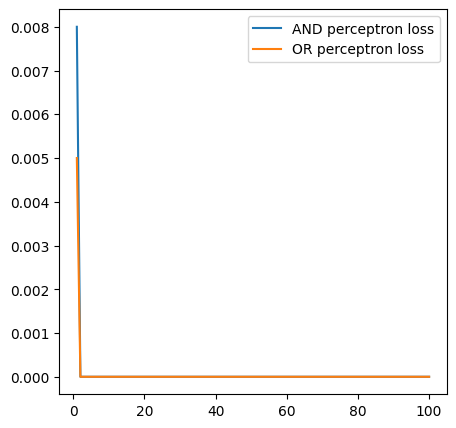

In [28]:
p_and = Perceptron(heasidive)
p_or = Perceptron(heasidive)

perceptron_and_data = p_and.fit(and_data[:,:2], and_data[:,2], 0.1, 100)
perceptron_or_data = p_or.fit(or_data[:,:2], or_data[:,2], 0.1, 100)

plt.figure(figsize=(5,5))
plt.plot(perceptron_and_data[:,0], perceptron_and_data[:,1], label='AND perceptron loss')
plt.plot(perceptron_or_data[:,0], perceptron_or_data[:,1], label='OR perceptron loss')
plt.legend()
plt.show()

Neurony z aktywacją relu

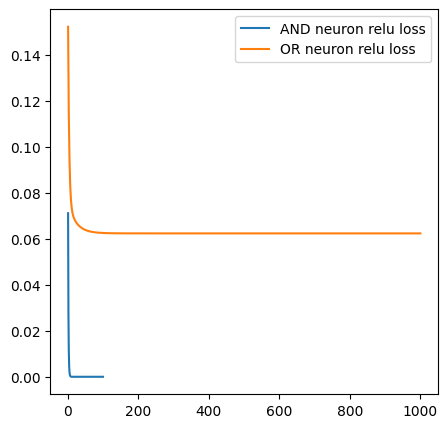

In [36]:
n_and_relu = Neuron(relu)
n_or_relu = Neuron(relu)
neuron_and_data_relu = n_and_relu.fit(and_data[:,:2], and_data[:,2], 0.01, 100)
neuron_or_data_relu = n_or_relu.fit(or_data[:,:2], or_data[:,2], 0.0001, 1000)

plt.figure(figsize=(5,5))
plt.plot(neuron_and_data_relu[:,0], neuron_and_data_relu[:,1], label='AND neuron relu loss')
plt.plot(neuron_or_data_relu[:,0], neuron_or_data_relu[:,1], label='OR neuron relu loss')
plt.legend()
plt.show()

Aktywacją sigmoidalną

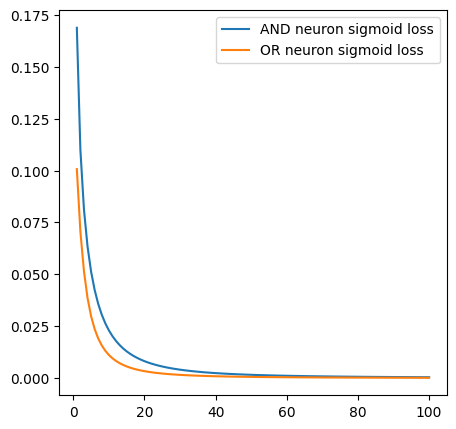

In [62]:
n_and_sigmoid = Neuron(sigmoid)
n_or_sigmoid = Neuron(sigmoid)
neuron_and_data_sigmoid = n_and_sigmoid.fit(and_data[:,:2], and_data[:,2], 0.01, 100)
neuron_or_data_sigmoid = n_or_sigmoid.fit(or_data[:,:2], or_data[:,2], 0.01, 100)

plt.figure(figsize=(5,5))
plt.plot(neuron_and_data_sigmoid[:,0], neuron_and_data_sigmoid[:,1], label='AND neuron sigmoid loss')
plt.plot(neuron_or_data_sigmoid[:,0], neuron_or_data_sigmoid[:,1], label='OR neuron sigmoid loss')
plt.legend()
plt.show()

Oraz aktywacją tanh

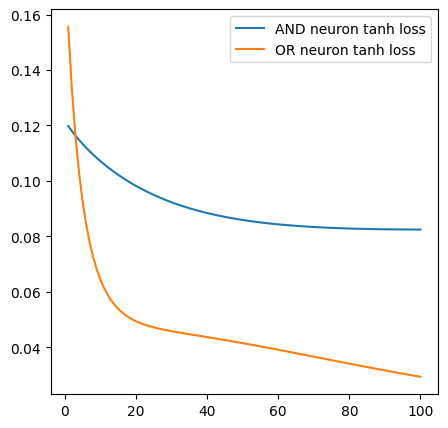

In [42]:
n_and_tanh = Neuron(tanh)
n_or_tanh = Neuron(tanh)
neuron_and_data_tanh = n_and_tanh.fit(and_data[:,:2], and_data[:,2], 0.0001, 100)
neuron_or_data_tanh = n_or_tanh.fit(or_data[:,:2], or_data[:,2], 0.0001, 100)

plt.figure(figsize=(5,5))
plt.plot(neuron_and_data_tanh[:,0], neuron_and_data_tanh[:,1], label='AND neuron tanh loss')
plt.plot(neuron_or_data_tanh[:,0], neuron_or_data_tanh[:,1], label='OR neuron tanh loss')
plt.legend()
plt.show()

Jak widać wiele perceptrony dają sobie radę najlepiej. Czy jednak trzeba się zastanowić czemu tak jest. Jak wyglądają wartości wyjściowe po poszczególnych funkcjach aktywacji?

In [50]:
print(f'Wartość wyjściowa funkcji relu dla wejścia 0.1: {relu(0.1)[0][0]}')
print(f'Wartość wyjściowa funkcji sigmoid dla wejścia 0.1: {sigmoid(0.1)}')
print(f'Wartość wyjściowa funkcji tanh dla wejścia 0.1: {tanh(0.1)[0][0]}')
print(f'Wartość wyjściowa funkcji heasidive dla wejścia 0.1: {heasidive(0.1)}')

Wartość wyjściowa funkcji relu dla wejścia 0.1: 0.1
Wartość wyjściowa funkcji sigmoid dla wejścia 0.1: 0.52497918747894
Wartość wyjściowa funkcji tanh dla wejścia 0.1: 0.0996679946249559
Wartość wyjściowa funkcji heasidive dla wejścia 0.1: 1


W przypadku klasyfikacji binarnej, czego przykładem może być bramka logiczna; zależy nam na tym aby wartości wyjściowe funkcji również były binarne. W przypadku powyższych funkcji aktywacji tylko heasidive spełnia te warunki.

I właśnie to tłumaczy zawrotną prędkość treningu perceptronu posiadającego funkcję aktywacji heasidive. Ponieważ jego wartości wyjściowe już były binarne, potrzebował on o wiele mniej iteracji aby znaleźć lokalne minimum funkcji błędu. W przypadku neuronów z funkcjami aktywacji sigmoidalną, relu i tanh, wartości wyjściowe były ciągłe, co sprawiło, że potrzebowały one więcej iteracji aby się "wyuczyć". Jednak trzeba pamiętać, że binarna funkcja aktywacji nie jest srebną kulą, która rozwiążae każdy postawiony przed nią problem. Wiele zadań, na których optymalizacji mogłoby nam zależeć mogą wymagać bardziej zniuansowanych funkcji aktywacji.

Porównanie wszystkich neuronów i perceptronów.

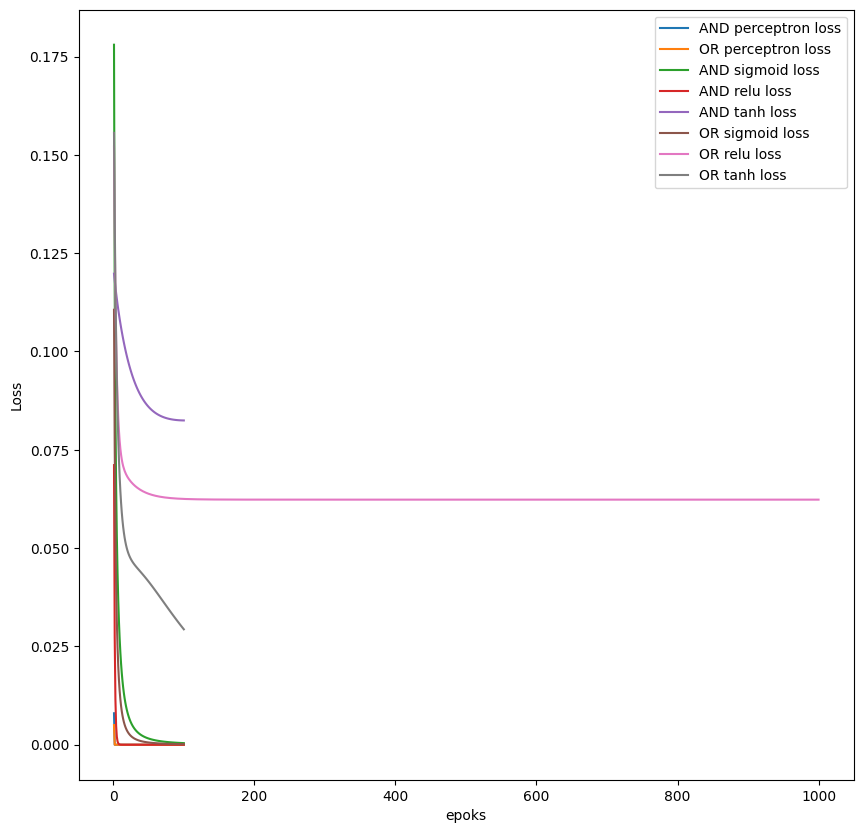

In [52]:
plt.figure(figsize=(10,10))
plt.plot(perceptron_and_data[:,0], perceptron_and_data[:,1], label='AND perceptron loss')
plt.plot(perceptron_or_data[:,0], perceptron_or_data[:,1], label='OR perceptron loss')
plt.plot(neuron_and_data_sigmoid[:,0], neuron_and_data_sigmoid[:,1], label='AND sigmoid loss')
plt.plot(neuron_and_data_relu[:,0], neuron_and_data_relu[:,1], label='AND relu loss')
plt.plot(neuron_and_data_tanh[:,0], neuron_and_data_tanh[:,1], label='AND tanh loss')
plt.plot(neuron_or_data_sigmoid[:,0], neuron_or_data_sigmoid[:,1], label='OR sigmoid loss')
plt.plot(neuron_or_data_relu[:,0], neuron_or_data_relu[:,1], label='OR relu loss')
plt.plot(neuron_or_data_tanh[:,0], neuron_or_data_tanh[:,1], label='OR tanh loss')
plt.xlabel('epoks')
plt.ylabel('Loss')
plt.legend()
plt.show()

Testowanie perceptronów AND i OR

In [57]:
print(f"Perceptron OR wejście {[0,0]}, wyjście {p_or.forward(np.array([0,0]))}")
print(f"Perceptron OR wejście {[0,1]}, wyjście {p_or.forward(np.array([0,1]))}")
print(f"Perceptron OR wejście {[1,0]}, wyjście {p_or.forward(np.array([1,0]))}")
print(f"Perceptron OR wejście {[1,1]}, wyjście {p_or.forward(np.array([1,1]))}")

Perceptron OR wejście [0, 0], wyjście 0
Perceptron OR wejście [0, 1], wyjście 1
Perceptron OR wejście [1, 0], wyjście 1
Perceptron OR wejście [1, 1], wyjście 1


In [58]:
print(f"Perceptron AND wejście {[0,0]}, wyjście {p_and.forward(np.array([0,0]))}")
print(f"Perceptron AND wejście {[0,1]}, wyjście {p_and.forward(np.array([0,1]))}")
print(f"Perceptron AND wejście {[1,0]}, wyjście {p_and.forward(np.array([1,0]))}")
print(f"Perceptron AND wejście {[1,1]}, wyjście {p_and.forward(np.array([1,1]))}")

Perceptron AND wejście [0, 0], wyjście 0
Perceptron AND wejście [0, 1], wyjście 0
Perceptron AND wejście [1, 0], wyjście 0
Perceptron AND wejście [1, 1], wyjście 1


Testowanie neuronów sygmoidalnych AND i OR

In [63]:
print(f"Neuron OR wejście {[0,0]}, wyjście {n_or_sigmoid.forward(np.array([0,0]))}")
print(f"Neuron OR wejście {[0,1]}, wyjście {n_or_sigmoid.forward(np.array([0,1]))}")
print(f"Neuron OR wejście {[1,0]}, wyjście {n_or_sigmoid.forward(np.array([1,0]))}")
print(f"Neuron OR wejście {[1,1]}, wyjście {n_or_sigmoid.forward(np.array([1,1]))}")

Neuron OR wejście [0, 0], wyjście [0.0204368]
Neuron OR wejście [0, 1], wyjście [0.99157884]
Neuron OR wejście [1, 0], wyjście [0.99136313]
Neuron OR wejście [1, 1], wyjście [0.99999846]


In [64]:
print(f"Neuron AND wejście {[0,0]}, wyjście {n_and_sigmoid.forward(np.array([0,0]))}")
print(f"Neuron AND wejście {[0,1]}, wyjście {n_and_sigmoid.forward(np.array([0,1]))}")
print(f"Neuron AND wejście {[1,0]}, wyjście {n_and_sigmoid.forward(np.array([1,0]))}")
print(f"Neuron AND wejście {[1,1]}, wyjście {n_and_sigmoid.forward(np.array([1,1]))}")

Neuron AND wejście [0, 0], wyjście [1.27941432e-05]
Neuron AND wejście [0, 1], wyjście [0.02207734]
Neuron AND wejście [1, 0], wyjście [0.0202492]
Neuron AND wejście [1, 1], wyjście [0.9733109]


Jak widać wartości wartości wyjściowe neuronów sygmoidalnych są zbliżone do wartości wyjściowych perceptronów.